# Prediction of Credit Approval

## Part 1: Data Preprocessing and EDA

### In this project, we'll be using [Australian Credit Card Approval Dataset](http://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval) from UCI Machine Learning Repository. The features in original dataset have been anonymized to protect the privacy, but from [this blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a good overview of the probable features.

### Load the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
# from ipynb.fs.defs.func import histogram, measures, evaluation_plot
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

### Load Dataset

In [7]:
df = pd.read_csv(r'D:\Learn\master\Projects\CC_Approval\data\Australian_Credit.csv')
df.columns = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel',
              'Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore',
              'DriverLicense','Citizen','ZipCode','Income','ApprovalStatus']
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


## Exploratory Data Analysis and Data Quality Assessment

### Handling Missing Values

In [10]:
df  = df.replace('?', np.NaN)
df.isnull().values.sum()

67

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriverLicense   690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [12]:
df.describe().T.style.background_gradient(cmap='Reds').set_properties()

,count,mean,std,min,25%,50%,75%,max
Debt,690.000000,4.758725,4.978163,0.000000,1.000000,2.750000,7.207500,28.000000
YearsEmployed,690.000000,2.223406,3.346513,0.000000,0.165000,1.000000,2.625000,28.500000
CreditScore,690.000000,2.400000,4.862940,0.000000,0.000000,0.000000,3.000000,67.000000
Income,690.000000,1017.385507,5210.102598,0.000000,0.000000,5.000000,395.500000,100000.000000


In [13]:
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = df[col].fillna(df[col].value_counts().index[0])

df.isnull().values.sum()

0

### add title

In [15]:
le = LabelEncoder()
df['ApprovalStatus'] = le.fit_transform(df['ApprovalStatus'])
df['Gender'] = le.fit_transform(df['Gender'])
df['PriorDefault'] = le.fit_transform(df['PriorDefault'])
df['Employed'] = le.fit_transform(df['Employed'])
df['DriverLicense'] = le.fit_transform(df['DriverLicense'])
df['ApprovalStatus'] = 1-df['ApprovalStatus']
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,202,0,1
1,0,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,43,560,1
2,0,24.5,0.500,u,g,q,h,1.50,1,0,0,0,g,280,824,1
3,1,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,100,3,1
4,1,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,y,p,e,h,1.25,0,0,0,0,g,260,0,0
686,0,22.67,0.750,u,g,c,v,2.00,0,1,2,1,g,200,394,0
687,0,25.25,13.500,y,p,ff,ff,2.00,0,1,1,1,g,200,1,0
688,1,17.92,0.205,u,g,aa,v,0.04,0,0,0,0,g,280,750,0


In [16]:
df= pd.get_dummies(df, columns = ['Married', 'BankCustomer', 'EducationLevel',
                                  'Ethnicity','Citizen'])
df.head()

,Gender,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,ZipCode,Income,...,Ethnicity_ff,Ethnicity_h,Ethnicity_j,Ethnicity_n,Ethnicity_o,Ethnicity_v,Ethnicity_z,Citizen_g,Citizen_p,Citizen_s
0,1,30.83,0.000,1.25,1,1,1,0,202,0,...,False,False,False,False,False,True,False,True,False,False
1,0,58.67,4.460,3.04,1,1,6,0,43,560,...,False,True,False,False,False,False,False,True,False,False
2,0,24.5,0.500,1.50,1,0,0,0,280,824,...,False,True,False,False,False,False,False,True,False,False
3,1,27.83,1.540,3.75,1,1,5,1,100,3,...,False,False,False,False,False,True,False,True,False,False
4,1,20.17,5.625,1.71,1,0,0,0,120,0,...,False,False,False,False,False,True,False,False,False,True


## Data Visualization
***
### Approval Status Distribution

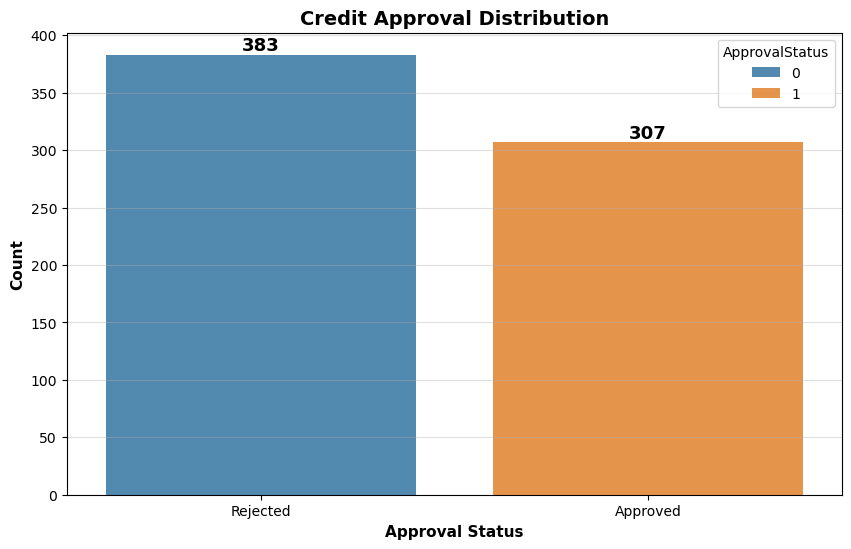

ApprovalStatus
0    383
1    307
Name: count, dtype: int64

In [18]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x = 'ApprovalStatus', data=df,
              order = df['ApprovalStatus'].value_counts().index, alpha=0.85, hue='ApprovalStatus')
for container in ax.containers: 
        ax.bar_label(container, fontweight="black", size=13)
plt.xlabel('Approval Status', fontweight='bold', fontsize=11)
plt.ylabel('Count', fontweight='bold', fontsize=11)
plt.xticks([0,1], labels=['Rejected', 'Approved'])
plt.title('Credit Approval Distribution', fontweight = 'bold', fontsize= 14)
plt.grid(axis='y', alpha=0.4)
plt.show()
df.ApprovalStatus.value_counts(dropna=False)

### Numerical Feature Distribution

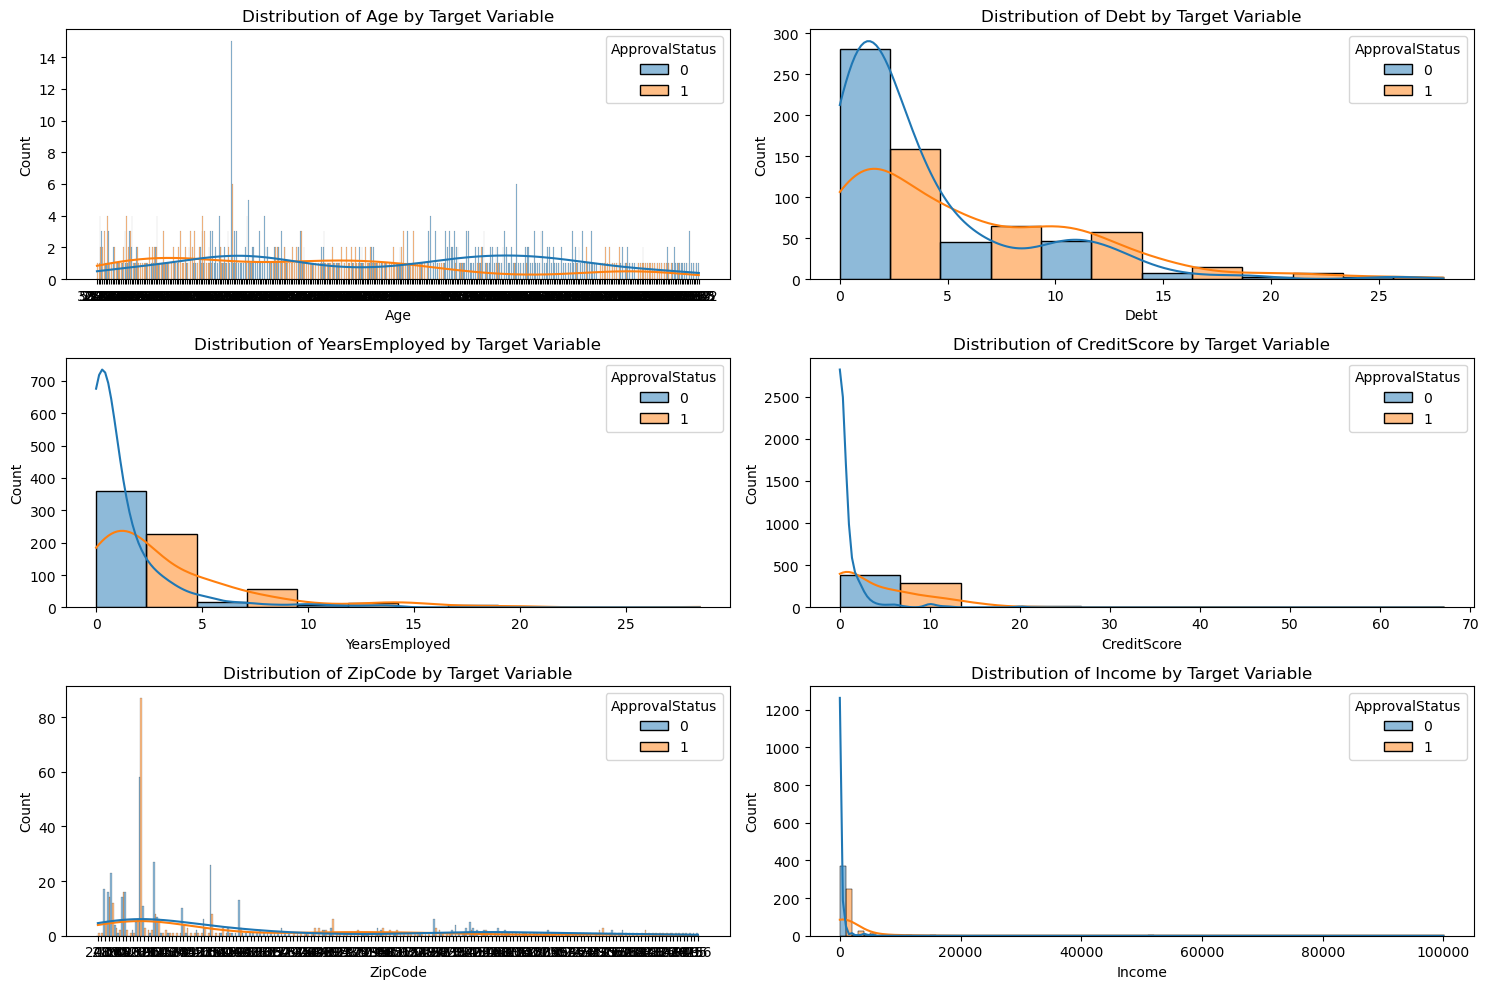

In [20]:
# histogram(df[['Age', 'Debt', 'YearsEmployed', 'CreditScore',
#              'ZipCode', 'Income']], 3, 2 ,kde=True)
numerical_columns = ['Age', 'Debt', 'YearsEmployed', 'CreditScore','ZipCode', 'Income']

custom_bins = {
    'Age':50,
    'Debt':6,
    'YearsEmployed':6,
    'CreditScore':5,
    'ZipCode':10,
    'Income':50
}
# Plot histograms with custom bins
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=column, hue='ApprovalStatus', kde=True, multiple="dodge", bins=custom_bins[column])
    plt.title(f'Distribution of {column} by Target Variable')

plt.tight_layout()
plt.show()


### Feature Scaling and Target Extraction

In [22]:
x = df.drop(['ApprovalStatus'], axis=1)
col = x.columns.tolist()
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x, columns=col)

y = df['ApprovalStatus']

### Categorical Feature Distribution

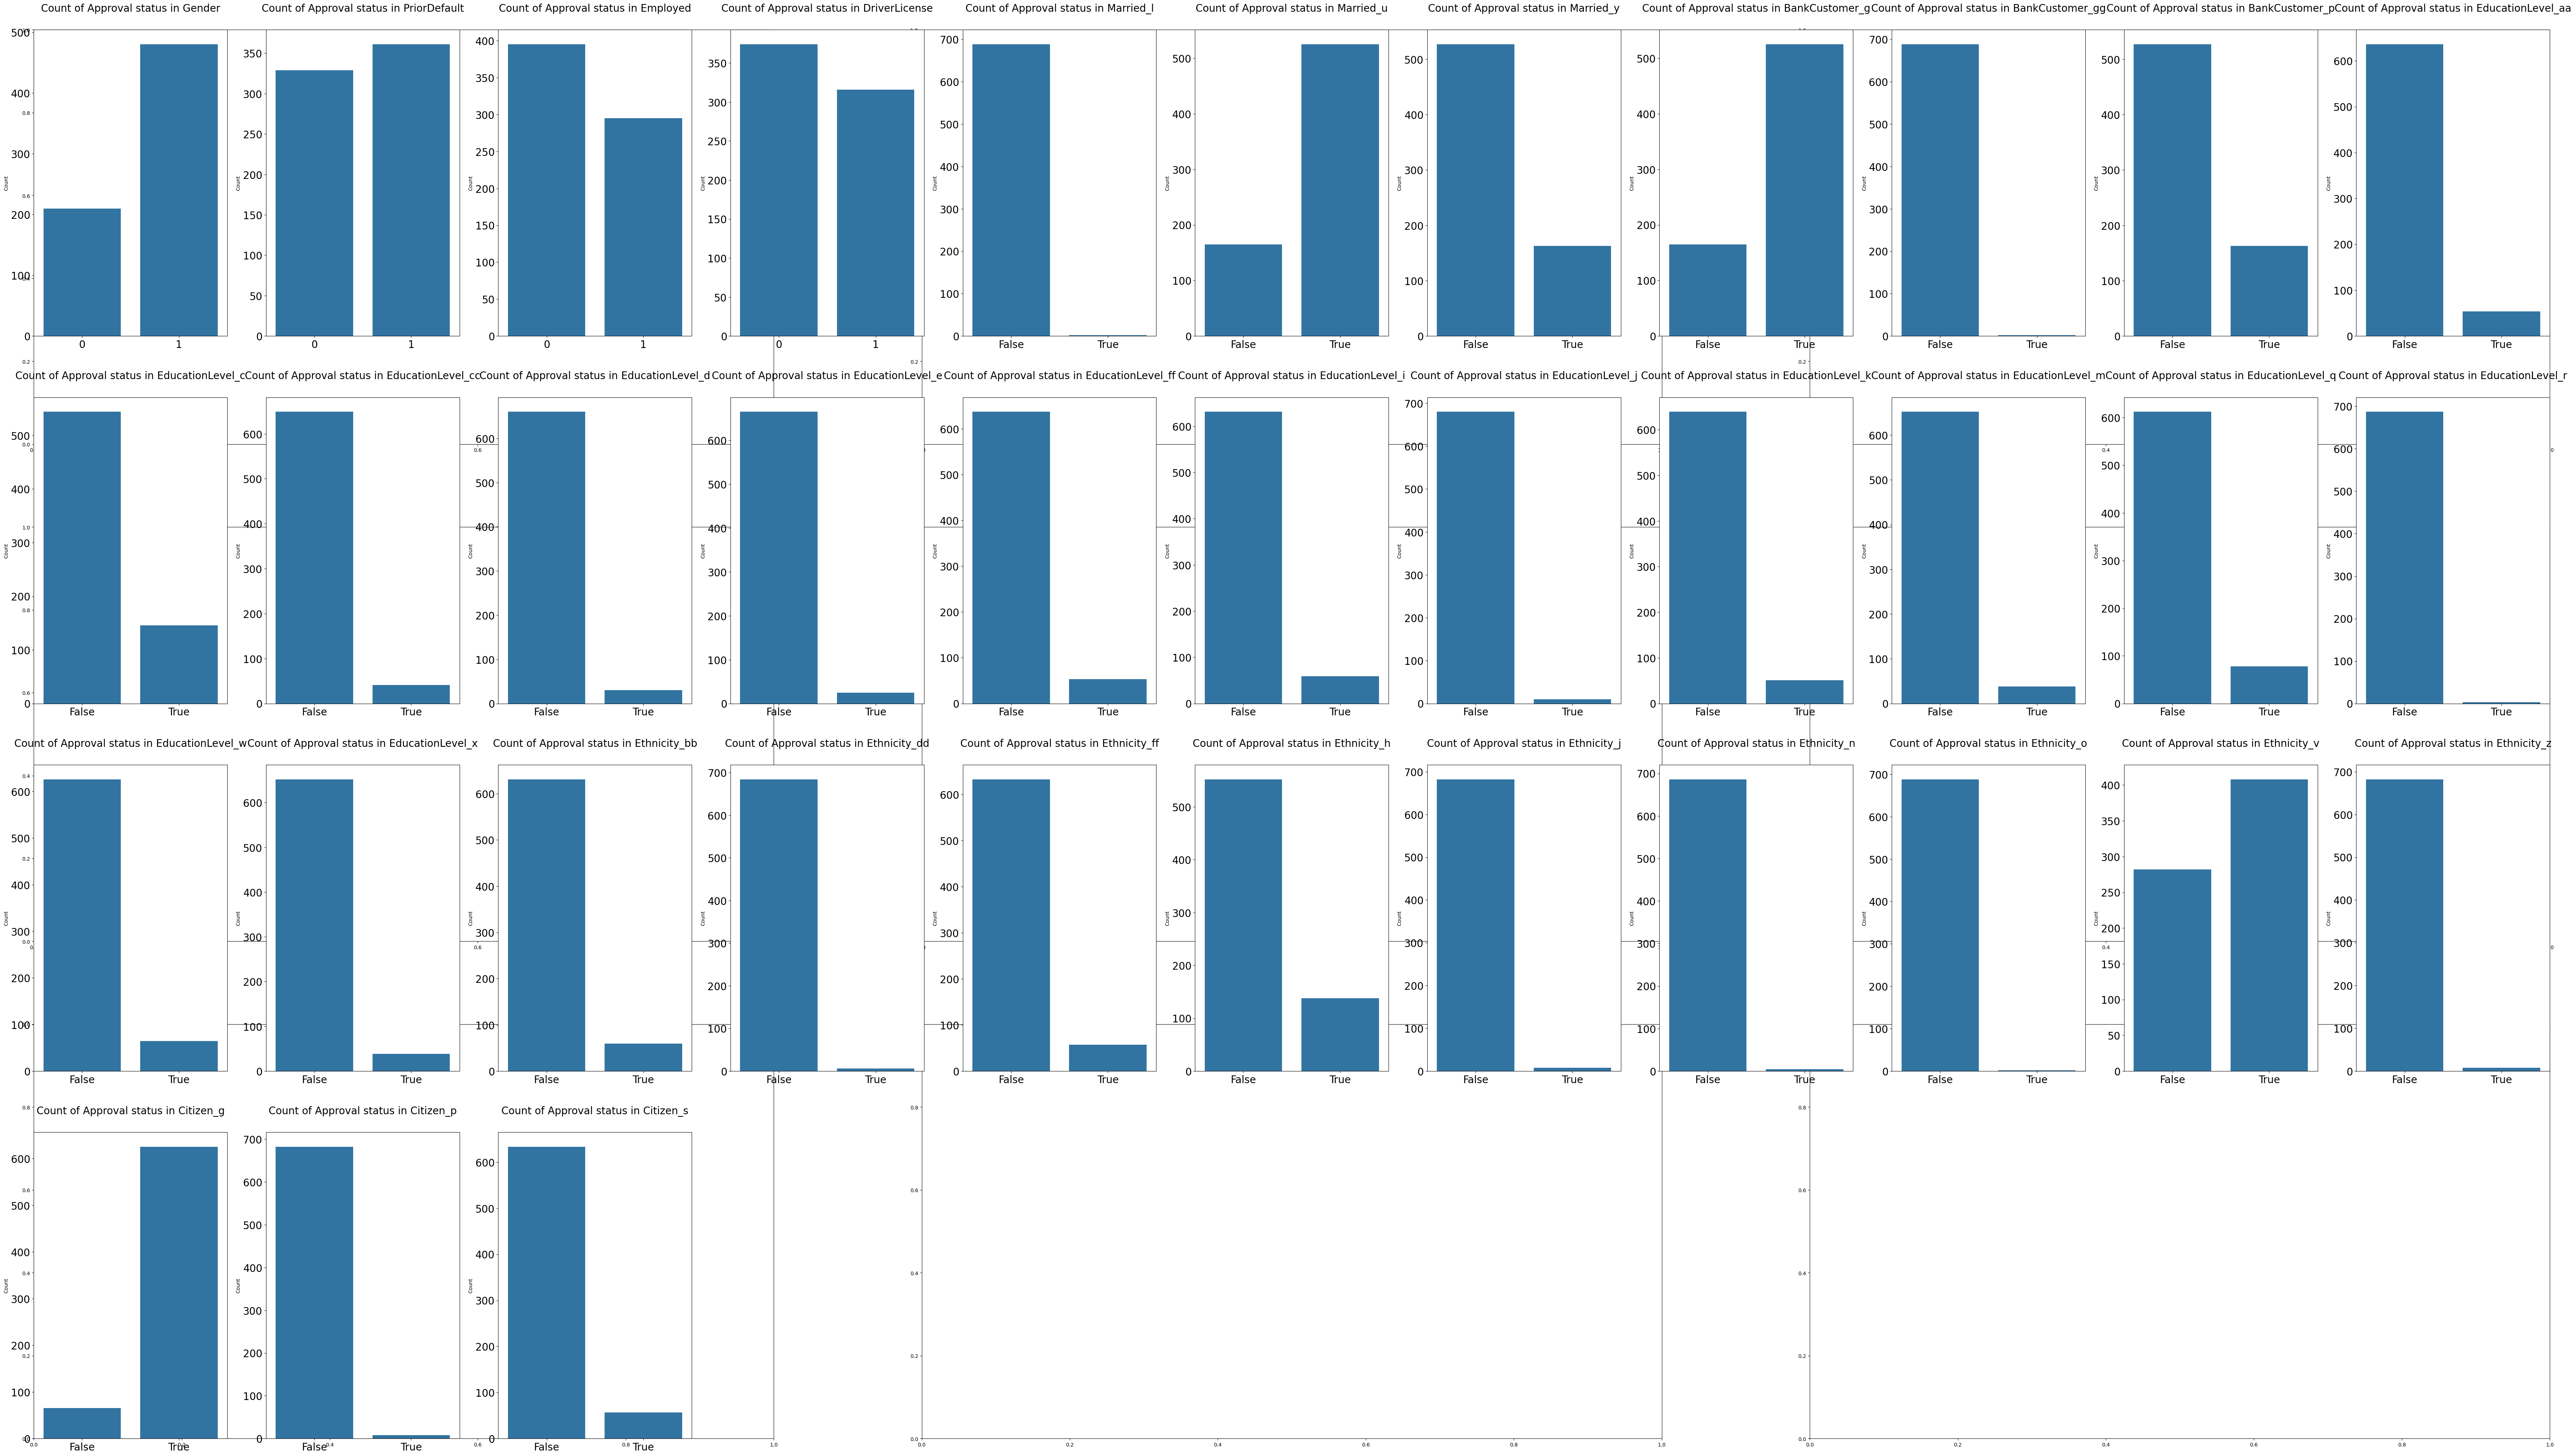

In [24]:
cat_feat= x.drop(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income'], axis=1)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(50,50))
plt.subplots_adjust(right=1.5)

for i , col in enumerate(cat_feat):
  plt.subplot(4, 11, i+1)
  sns.countplot(x=col, data= df)
  plt.xlabel('')
  plt.ylabel('Count')
  plt.tick_params(axis='x', labelsize=20)
  plt.tick_params(axis='y', labelsize=20)
  plt.title('Count of Approval status in {}'.format(col), size=20, y=1.05)

plt.show()

### Exploring Feature Correlations with a Heatmap

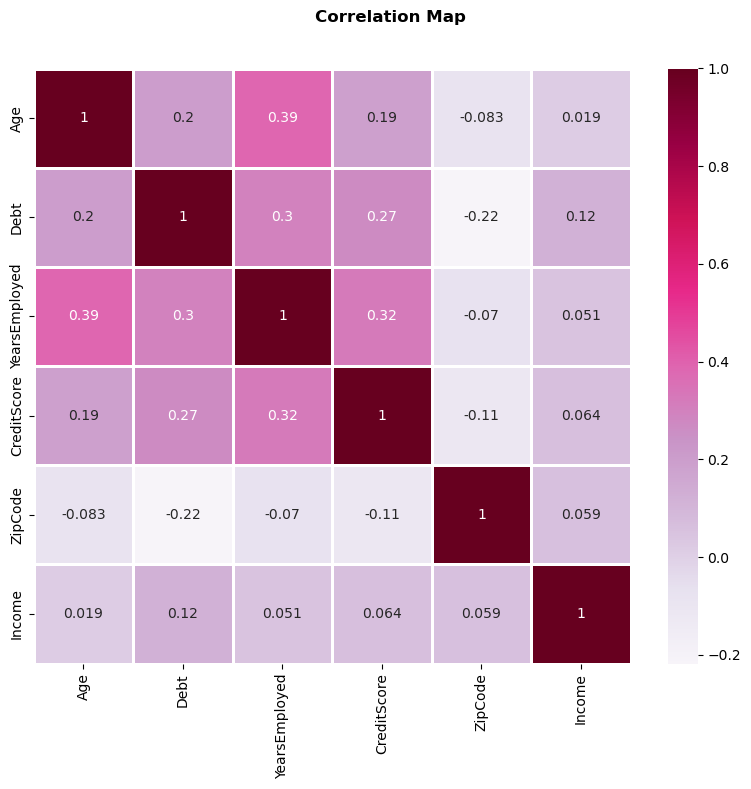

In [26]:
plt.figure(figsize=(8, 8))
sns.heatmap(x[['Age', 'Debt', 'YearsEmployed', 'CreditScore',
             'ZipCode', 'Income']].corr(), annot=True, cmap='PuRd', linewidths= 0.75, )
plt.suptitle('Correlation Map', fontweight='heavy', x=0.4, y=1.02, 
             ha='left', fontsize='12')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 9,shuffle=True)

## Importing the Processed Data into Pickle Files

In [29]:
with open('x_train.pickle', 'wb')as file:
    pickle.dump(x_train, file)
    
with open('x_test.pickle', 'wb')as file:
    pickle.dump(x_test, file)

In [30]:
with open('y_train.pickle', 'wb')as file:
    pickle.dump(y_train, file)
    
with open('y_test.pickle', 'wb')as file:
    pickle.dump(y_test, file)